In [12]:
# import necessary libraries for machine learning classification model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from joblib import load, dump
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [15]:
df = pd.read_excel('Data/cleaned_data.xlsx')
print(len(df))

1991


# Evaluation Metrics Used:
- Accuracy 
- Confusion matrix
- Classification report

In [16]:
def evaluate_model(y, y_pred):
    print('Accuracy:', accuracy_score(y, y_pred))
    print('\n')
    print('Confusion Matrix:')
    print(confusion_matrix(y, y_pred))
    print('\n')
    print('Classification Report:')
    print(classification_report(y, y_pred))
    print('\n')

Choosing most important features to be used for training and evaluating the 
- higest 5 features in terms of correaltion with price_range are:
  1- ram
  2- battery_power
  3- px_width
  4- px_height
  5- int_memory

In [17]:

# choose the best featuers according to the correlation with the target variable price_range
correlation = df.corr()
correlation = correlation['price_range']
# absolute values of the correlation
correlation = correlation.abs()
correlation = correlation.sort_values(ascending=False)
correlation = correlation.drop('price_range')
print(correlation)

ram              0.917448
battery_power    0.199277
px_width         0.163319
px_height        0.147956
int_memory       0.041812
sc_w             0.038371
pc               0.034716
mobile_wt        0.032168
touch_screen     0.030315
three_g          0.024896
fc               0.024738
sc_h             0.021643
blue             0.021330
talk_time        0.020511
wifi             0.019546
dual_sim         0.019108
four_g           0.015537
clock_speed      0.006675
n_cores          0.004662
m_dep            0.001396
Name: price_range, dtype: float64


In [18]:
# retrieve the hight 5 features
features = correlation.index[:4]
X = df[features]
y = df['price_range']
X.head()


,ram,battery_power,px_width,px_height
0,0.612774,0.227789,0.170895,0.010204
1,0.634687,0.347361,0.993324,0.461735
2,0.627205,0.041416,0.811749,0.644388
3,0.671566,0.076152,0.858478,0.620408
4,0.308658,0.881764,0.475300,0.616327


In [19]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Logisitic regression model trial
- Since logistic regression is a simple model that handles a classification problem well
- Accuracy of the model was 94%, which is high 

In [20]:

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_val)
evaluate_model(y_val, y_pred)

Accuracy: 0.9448621553884712


Confusion Matrix:
[[106   0   0   0]
 [  2  85   2   0]
 [  0   7  92   8]
 [  0   0   3  94]]


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       106
           1       0.92      0.96      0.94        89
           2       0.95      0.86      0.90       107
           3       0.92      0.97      0.94        97

    accuracy                           0.94       399
   macro avg       0.94      0.95      0.94       399
weighted avg       0.95      0.94      0.94       399





# Random forest model trial
- Decision trees are prone to overfitting, however, random forests are a good way to mitigate this issue. Since the data is not very complex, some rules can be deduced such as the ones proposed in the EDA analysis. As such, a random forest model should be able to predict the price range with a reasonably good accuracy

- While the Random Forest model does show good results, the logistic regression is still
produces better results. The accuracy rises minimally by increasing the number of estimators, but this comes at the cost of computational power.

In [21]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_val)
evaluate_model(y_val, y_pred)

Accuracy: 0.924812030075188


Confusion Matrix:
[[100   6   0   0]
 [  7  79   3   0]
 [  0   5  95   7]
 [  0   0   2  95]]


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       106
           1       0.88      0.89      0.88        89
           2       0.95      0.89      0.92       107
           3       0.93      0.98      0.95        97

    accuracy                           0.92       399
   macro avg       0.92      0.92      0.92       399
weighted avg       0.93      0.92      0.92       399





# SVM model trial
- Since from EDA, we found that data is relatively linearly seperable. SVM with linear kernel performs well for this type of data since it maximizes the margin between the classes, which generalizes the data well and reduces overfitting.

In [22]:
svm = SVC(kernel='linear', C=2)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_val)
evaluate_model(y_val, y_pred)

Accuracy: 0.9624060150375939


Confusion Matrix:
[[104   2   0   0]
 [  1  87   1   0]
 [  0   4  99   4]
 [  0   0   3  94]]


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       106
           1       0.94      0.98      0.96        89
           2       0.96      0.93      0.94       107
           3       0.96      0.97      0.96        97

    accuracy                           0.96       399
   macro avg       0.96      0.96      0.96       399
weighted avg       0.96      0.96      0.96       399





# knn model trail
- KNN is a simple memory-based algorithim, since also selected features for training and prediction is quite small,
the model was chosen as a trial
- The model produced a reasonable accuracy but still less than other models.

In [23]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
evaluate_model(y_val, y_pred)

Accuracy: 0.9047619047619048


Confusion Matrix:
[[103   3   0   0]
 [  6  77   6   0]
 [  0   8  91   8]
 [  0   0   7  90]]


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       106
           1       0.88      0.87      0.87        89
           2       0.88      0.85      0.86       107
           3       0.92      0.93      0.92        97

    accuracy                           0.90       399
   macro avg       0.90      0.90      0.90       399
weighted avg       0.90      0.90      0.90       399





# XGBoost model trial
- XGboost works by combining the predictions of many weak models to create a strong model
- Since data is fairly simple, simple and weak classifiers can produce good results
- XGboost combines them, prodcing better results

In [24]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_val)
evaluate_model(y_val, y_pred)

Accuracy: 0.9373433583959899


Confusion Matrix:
[[101   5   0   0]
 [  2  84   3   0]
 [  0   6  95   6]
 [  0   0   3  94]]


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       106
           1       0.88      0.94      0.91        89
           2       0.94      0.89      0.91       107
           3       0.94      0.97      0.95        97

    accuracy                           0.94       399
   macro avg       0.94      0.94      0.94       399
weighted avg       0.94      0.94      0.94       399





# Summary
 - SVM model produced highest results in terms of metrics, therefore it was selected for prediction.

 - Logistic regression is also a linear classifier, but it minimizes the logistic loss function rather than maximizing the margin between classes, as SVM does. SVM can perform better when the classes are well-separated because it directly optimizes for a larger margin, while logistic regression may not handle this as efficiently.

- Random Forest is a tree-based model, which works well for non-linear decision boundaries and can handle a variety of data types. However, in cases where the decision boundary between classes is approximately linear, an SVM with a linear kernel may outperform Random Forest. Random Forests can also be prone to overfitting, especially if there’s noise in the data.

- XGBoost is a boosting algorithm that often works well for non-linear data and imbalanced datasets. However, it might require more hyperparameter tuning and longer training times. If the decision boundary is mostly linear, a well-tuned SVM can be simpler, faster, and more effective than XGBoost. XGBoost is often more effective for complex, non-linear problems.

- KNN is simpler than SVM, but didn't produce higher results as SVM, since the correlation between features and price_range
is not balanced, and KNN gives all features the same importance

In [25]:
dump(svm, 'Outputs/svm_model.pkl')
dump(features, 'Outputs/selected_features.pkl') 

['Outputs/selected_features.pkl']

# Analyzing on test data

In [22]:
test = pd.read_excel('Data/test.xlsx')
scaler = load('Outputs/scaler.pkl')
features = load('Outputs/selected_features.pkl')
svm = load('Outputs/svm_model.pkl')
print(features)

Index(['ram', 'battery_power', 'px_width', 'px_height'], dtype='object')


In [19]:
test.iloc[:, 1:] = scaler.fit_transform(test.iloc[:, 1:])       
x_test = test[features]

C:\Users\user\AppData\Local\Temp\ipykernel_10648\3711158260.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.36224149 0.22748499 0.87191461 0.69779853 0.62308205 0.6430954
 0.81254169 0.2221481  0.40760507 0.68045364 0.66711141 0.56237492
 0.26684456 0.46030687 0.08672448 0.89793195 0.99066044 0.36157438
 0.48765844 0.65910607 0.31220814 0.01934623 0.70580387 0.02201468
 0.35823883 0.35023349 0.90593729 0.32021348 0.09606404 0.34956638
 0.98799199 0.58705804 0.70513676 0.4676451  0.38292195 0.4503002
 0.5203469  0.81054036 0.44362909 0.04469646 0.96864576 0.21480987
 0.12341561 0.59239493 0.98198799 0.60773849 0.39626418 0.76917945
 0.27751835 0.80853903 0.25483656 0.08805871 0.62841895 0.26684456
 0.75383589 0.7311541  0.51501001 0.760507   0.40760507 0.92661775
 0.93862575 0.01934623 0.05203469 0.75650434 0.68912608 0.10673783
 0.89859907 0.47098065 0.03268846 0.80386925 0.57771848 0.99466311
 0.40160107 0.

In [20]:
y_pred = svm.predict(x_test)
test['price_range'] = y_pred
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,0.362241,1,0.52,1,0.736842,0,0.048387,0.000000,0.941667,...,0.118511,0.608550,0.862319,0.500000,0.388889,0.000000,0,1,0,3
1,2,0.227485,1,0.00,1,0.210526,1,0.951613,0.777778,0.925000,...,0.391190,0.237809,0.974772,0.071429,0.000000,0.277778,1,0,0,3
2,3,0.871915,1,0.92,0,0.052632,0,0.403226,0.888889,0.883333,...,0.665967,0.577822,0.572464,0.857143,0.555556,0.444444,0,1,1,3
3,4,0.697799,0,0.00,1,0.947368,1,0.370968,0.444444,0.133333,...,0.154693,0.835671,0.974235,0.357143,0.000000,0.277778,1,1,0,3
4,5,0.623082,0,0.36,0,0.578947,1,0.758065,0.444444,0.233333,...,0.392764,0.206413,0.405260,0.714286,0.444444,0.277778,1,0,1,1


1000


<Axes: xlabel='price_range'>

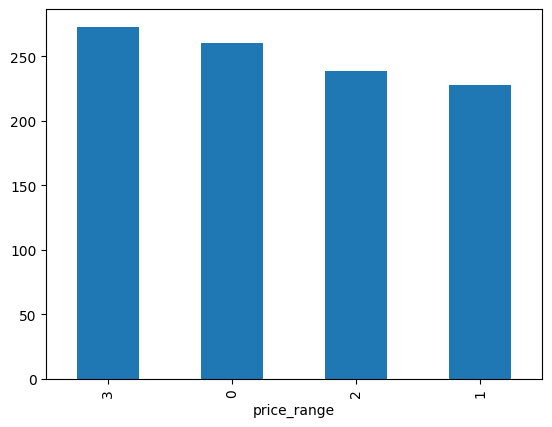

In [21]:
print(len(test))
test['price_range'].value_counts().plot(kind='bar')